# This is the code we used to obtain results for the portfolios

### this shows the analysis of the resulte obtained by the volume, highest price, lowest price, closing bid, opening bid, and volume of the SPY index fund

In [1]:
import pandas as pd

In [2]:
# Read in the data
r = pd.read_csv('result.csv')

In [3]:
r

,Unnamed: 0,real,predict
0,0,273.03000,266.07773
1,1,273.10999,267.34552
2,2,271.39999,268.31934
3,3,270.04999,269.04620
4,4,270.39999,269.54956
...,...,...,...
720,720,369.00000,374.32516
721,721,372.17001,375.12115
722,722,371.45999,376.02542
723,723,371.98999,376.77870


In [4]:
# Running a regression to look in to the amount of variability that can be explained by this model

# > 90% R^2 is a good outcome

from statsmodels.formula.api import ols
model = ols('predict ~ real', r).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                predict   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:46:55   Log-Likelihood:                -2474.8
No. Observations:                 725   AIC:                             4954.
Df Residuals:                     723   BIC:                             4963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6848      2.810      3.447      0.0

In [5]:
r = r.rename(columns = {'Unnamed: 0':'Trading Day'})

In [6]:
r

,Trading Day,real,predict
0,0,273.03000,266.07773
1,1,273.10999,267.34552
2,2,271.39999,268.31934
3,3,270.04999,269.04620
4,4,270.39999,269.54956
...,...,...,...
720,720,369.00000,374.32516
721,721,372.17001,375.12115
722,722,371.45999,376.02542
723,723,371.98999,376.77870


### Creating columns for the implied returns based on the predicted prices. Then we get weather we predict weather the price goes up or down and which way it actually went.

In [7]:
r['real returns'] = r['real'].pct_change()
r['predicted returns'] = r['predict'].pct_change()

In [8]:
r['realdirection'] = r['real returns'] >= 0
r['predicteddirection'] = r['predicted returns'] >= 0

In [9]:
(r[r['realdirection'] == r['predicteddirection']])

,Trading Day,real,predict,real returns,predicted returns,realdirection,predicteddirection
0,0,273.03000,266.07773,NaN,NaN,False,False
1,1,273.10999,267.34552,0.000293,0.004765,True,True
4,4,270.39999,269.54956,0.001296,0.001871,True,True
5,5,274.70999,269.82678,0.015939,0.001028,True,True
6,6,277.89999,270.22534,0.011612,0.001477,True,True
...,...,...,...,...,...,...,...
719,719,367.57001,373.81600,0.000899,0.000464,True,True
720,720,369.00000,374.32516,0.003890,0.001362,True,True
721,721,372.17001,375.12115,0.008591,0.002126,True,True
723,723,371.98999,376.77870,0.001427,0.002003,True,True


In [10]:
# Changing True False to binary

r['realdirection'] = r['realdirection'] * 1
r['predicteddirection'] = r['predicteddirection'] * 1

In [11]:
r['portfolio'] = r['real returns'] * r['predicteddirection']

In [12]:
r = r.dropna()

### This graph shows the decrease in volitility in the portoflio reutrns and the real returns

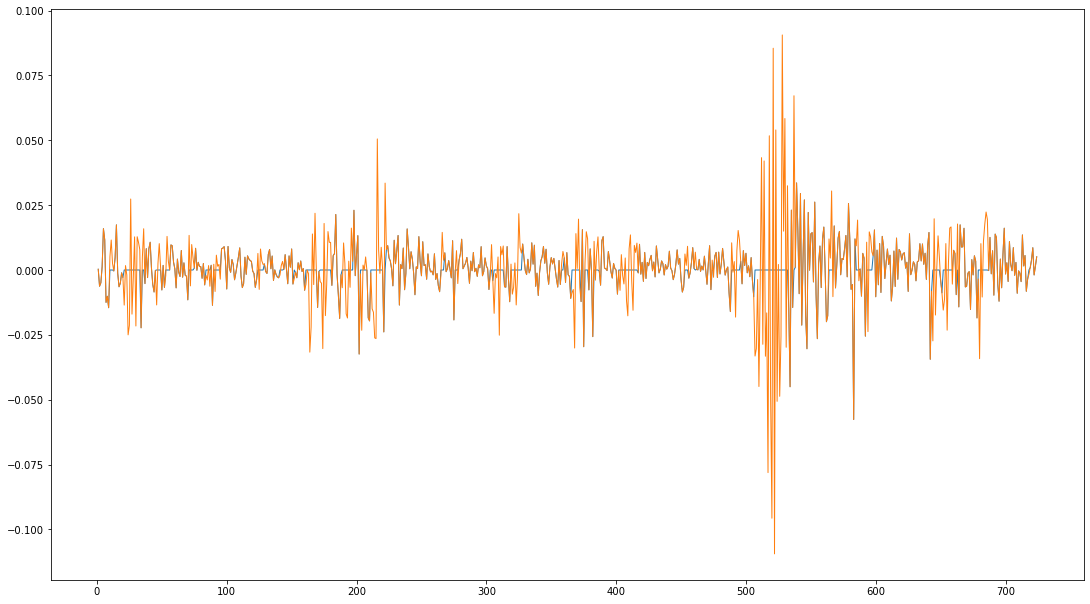

In [13]:
import matplotlib.pyplot as plt
x = r['Trading Day']
y = r[['portfolio','real returns']]
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=1.0)
fig.set_size_inches(18.5, 10.5)
plt.show()

### Calculationg sharpe ratios

In [14]:
print('sharpe for the portfolio', (r['portfolio'].mean()/r['portfolio'].std()) * (252 ** (1/2)))
print('Sharpe for the market', (r['real returns'].mean()/r['real returns'].std()) * (252 ** (1/2)))

sharpe for the portfolio 0.8807887270601197
Sharpe for the market 0.5915262225770431


### Estimating returns on the two portfolios

In [15]:
market = []
x = 100
for i in list(r['real returns'] + 1):
    x = x * i
    market.append(x)
print('returns for $100 in the market: ', x )

portfolio = []
x = 100
for i in list(r['portfolio'] + 1):
    x = x * i
    portfolio.append(x)
print('returns for $100 in the portfolio: ', x )

returns for $100 in the market:  136.9373328938213
returns for $100 in the portfolio:  133.217920743292


In [16]:
g = pd.DataFrame()
g['portfolio'] = portfolio
g['market'] = market

## Plot of the two portfolios preformance.

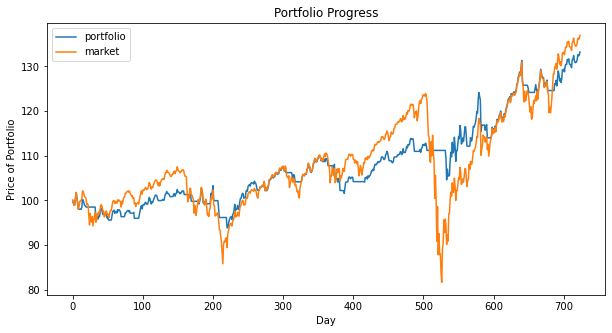

In [17]:
g.plot(figsize= (10,5))
plt.legend(loc = 'best')
plt.title("Portfolio Progress")
plt.xlabel("Day")
plt.ylabel("Price of Portfolio")
plt.show()